In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from datetime import datetime

# 4.1 Simple Linear Regression

In [7]:
# Create sample data
STR=np.array([15,17,19,20,22,23.5,25])
TestScore=np.array([680,640,670,660,630,660,635])
# Print out sample data
print(STR)
print(TestScore)

[15.  17.  19.  20.  22.  23.5 25. ]
[680 640 670 660 630 660 635]


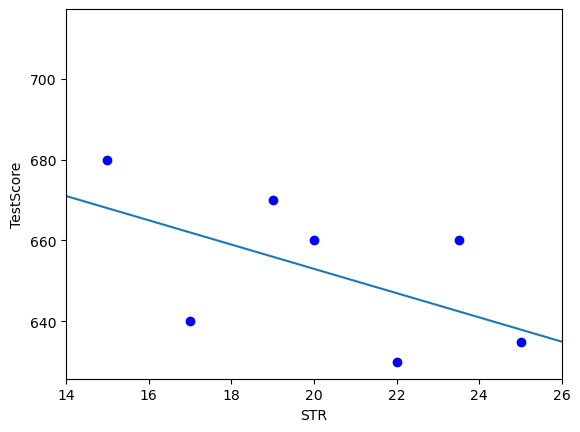

In [8]:
# create a scatterplot of the data
plt.plot(STR,TestScore,  'bo')
# add the systematic relationship to the plot
plt.axline((0,713),slope=-3)

plt.xlabel('STR')
plt.ylabel('TestScore')
plt.xlim(14,26);

# 4.2 Estimating the Coefficients of the Linear Regression

In [9]:
# load the the data set in the workspace
CASchools=pd.read_csv('CASchools.csv')
type(CASchools)

pandas.core.frame.DataFrame

In [10]:
CASchools.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


In [11]:
# compute STR and append it to CASchools
CASchools['STR']=CASchools['students']/CASchools['teachers']
# compute TestScore and append it to CASchools
CASchools['score'] = (CASchools['read'] + CASchools['math'])/2 

In [6]:
quantiles = np.array([0.10, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9])
['a']+['Quantile_{}'.format(i) for i in quantiles]

['a',
 'Quantile_0.1',
 'Quantile_0.25',
 'Quantile_0.4',
 'Quantile_0.5',
 'Quantile_0.6',
 'Quantile_0.75',
 'Quantile_0.9']

In [15]:
# compute sample averages of STR and score
avg_STR = CASchools['STR'].mean() 
avg_score = CASchools['score'].mean()

# compute sample standard deviations of STR and score
sd_STR= CASchools['STR'].std()
sd_score = CASchools['score'].std()

# set up a vector of percentiles and compute the quantiles 
quantiles = np.array([0.10, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9])
quant_STR = np.quantile(CASchools['STR'], quantiles)
quant_score = np.quantile(CASchools['score'], quantiles)

# gather everything in a data.frame 
DistributionSummary = pd.DataFrame(data=[list(np.append([avg_STR, sd_STR],quant_STR)),list(np.append([avg_score, sd_score],quant_score))],
                                   columns=['Average', 'StandardDeviation']+['Quantile_{}'.format(i) for i in quantiles])
# print the summary to the console
DistributionSummary

,Average,StandardDeviation,Quantile_0.1,Quantile_0.25,Quantile_0.4,Quantile_0.5,Quantile_0.6,Quantile_0.75,Quantile_0.9
0,19.640425,1.891812,17.348596,18.582360,19.266177,19.723209,20.078303,20.871814,21.867405
1,654.156548,19.053347,630.395023,640.050003,649.069989,654.449997,659.399994,666.662491,678.859988


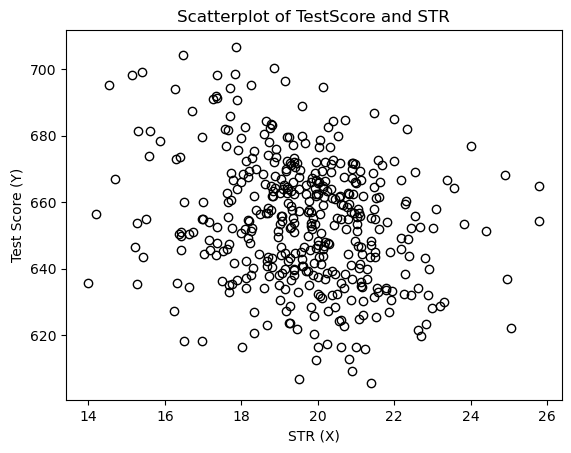

In [15]:
plt.plot(CASchools['STR'], CASchools['score'], 'ko', fillstyle='none')
plt.xlabel('STR (X)')
plt.ylabel('Test Score (Y)')
plt.title('Scatterplot of TestScore and STR');

In [9]:
np.corrcoef(CASchools['STR'], CASchools['score'])

array([[ 1.        , -0.22636275],
       [-0.22636275,  1.        ]])

## The Ordinary Least Sqaures Estimator

In [16]:
# compute beta_1_hat
beta_1 = ((CASchools['STR'] - CASchools['STR'].mean()) * (CASchools['score'] - CASchools['score'].mean())).sum() / ((CASchools['STR'] - CASchools['STR'].mean())**2).sum()

# compute beta_0_hat
beta_0 = CASchools['score'].mean() - beta_1 * CASchools['STR'].mean()

# print the results to the console
print(beta_1)
print(beta_0)


-2.279808140144672
698.9329492769929


In [17]:
# estimate the model and assign the result to linear_model
Y=CASchools['score'] #Dependent variable
X=CASchools['STR'] #Independent variable
X=sm.add_constant(X) #adding constant
linear_model=sm.OLS(Y,X).fit()

# print the standard output of the estimated lm object to the console 
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.78e-06
Time:                        14:14:22   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9329      9.467     73.825      0.000     680.323     717.543
STR           -2.2798      0.480     -4.751      0.000      -3.223      -1.337
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

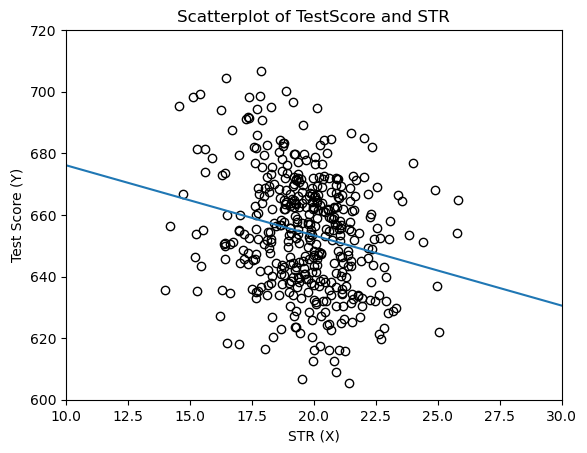

In [18]:
#plot the data
plt.plot(CASchools['STR'], CASchools['score'], 'ko', fillstyle='none')
plt.xlabel('STR (X)')
plt.ylabel('Test Score (Y)')
plt.title('Scatterplot of TestScore and STR')
plt.xlim(10, 30)
plt.ylim(600, 720)

#add the regression line
plt.axline((0,linear_model.params[0]), slope=linear_model.params[1]);

# 4.3 Measures of Fit

## Application to the Test Score Data

In [13]:
mod_summary=linear_model.summary()
mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           2.78e-06
Time:                        15:29:59   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9329      9.467     73.825      0.000     680.323     717.543
STR           -2.2798      0.480     -4.751      0.000      -3.223      -1.337
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# compute R^2 manually
SSR = (linear_model.resid**2).sum()
TSS = ((CASchools['score']- CASchools['score'].mean())**2).sum()
R2 = 1 - SSR/TSS

# print the value to the console
print(R2)

# compute SER manually
n = len(CASchools)
SER = np.sqrt(SSR / (n-2))

# print the value to the console
print(SER)

0.05124009255177209
18.580966694033535


# 4.4 The Least Squares Assumption


## Assumption 1: The Error Term has Conditional Mean of Zero

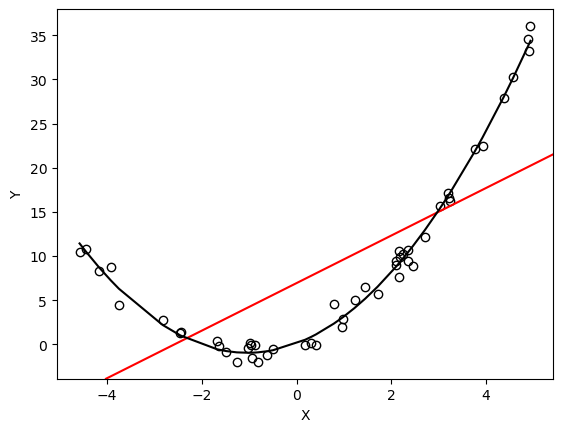

In [24]:
# set a seed to make the results reproducible
np.random.seed(6)

# simulate the data 
X = np.random.uniform(-5,5,50)
u = np.random.normal(0,1, size=50)  

# the true relation  
Y = X**2 + 2*X + u                

# estimate a simple regression model 
X1=sm.add_constant(X) #adding constant
mod_simple =sm.OLS(Y,X1).fit()

# predict using a quadratic model 
prediction = smf.ols(formula='Y ~ X + I(X**2)', data=pd.DataFrame({"Y":Y,"X":X })).fit().predict(exog=dict(X=np.sort(X)))

# plot the results
plt.plot( X,Y, 'ko', fillstyle='none')
plt.axline((0,mod_simple.params[0]), slope=mod_simple.params[1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(np.sort(X),prediction, color='black');

## Assumption 2: Independently and Identically Distributed Data

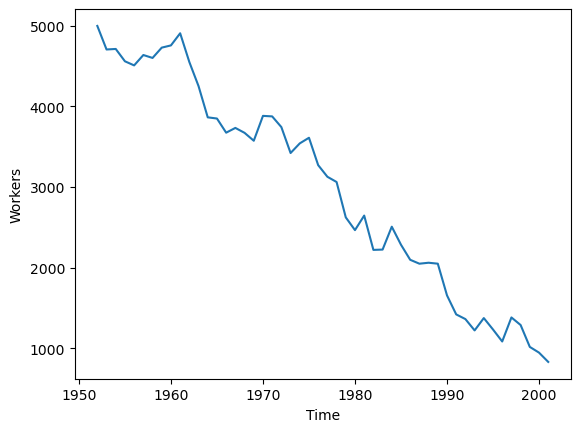

In [26]:
# set seed
np.random.seed(13)

# generate a date vector
Date=pd.date_range(start=datetime(1951, 1, 1), periods=50, freq='A')

# initialize the employment vector
X=np.append([5000],[np.repeat(np.nan,len(Date)-1)])

# generate time series observations with random influences
for i in range(1, len(Date)):
    X[i]= -50 + 0.98 * X[i-1] + np.random.normal(size=1, scale=200)

#plot the results
plt.plot( Date,X)
plt.xlabel('Time')
plt.ylabel('Workers');

## Assumption 3: Large Outliers are Unlikely

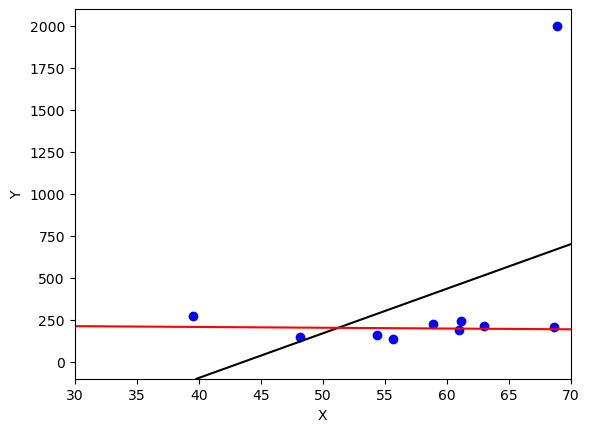

In [17]:
# set seed
np.random.seed(13)

# generate the data
X= np.sort(np.random.uniform(low=30, high=70, size=10))
Y = np.random.normal(size=10 , loc = 200, scale = 50)
Y[9] = 2000

# fit model with outlier
X1=sm.add_constant(X) #adding constant
fit=sm.OLS(Y,X1).fit()

# fit model without outlier
fitWithoutOutlier = sm.OLS(Y[:9],X1[:9]).fit()

# plot the results
plt.plot( X,Y, 'bo')
plt.axline((0,fit.params[0]), slope=fit.params[1], color='black')
plt.axline((0,fitWithoutOutlier.params[0]), slope=fitWithoutOutlier.params[1], color='red')
plt.xlim(30,70)
plt.ylim(-100,2100)
plt.xlabel('X')
plt.ylabel('Y');

# 4.5 The Sampling Distribution of the OLS Estimator

## Simulation Study 1

In [27]:
# simulate data
N = 100000
X = np.random.uniform(size=N, low = 0, high = 20)
u = np.random.normal(size=N, scale = 10)

# population regression
Y = -2 + 3.5 * X + u
population = pd.DataFrame({'X':X,'Y': Y})


In [28]:
# set sample size
n = 100

# compute the variance of beta_hat_0
H_i = 1 - np.mean(X) / np.mean(X**2) * X
var_b0 = np.var(H_i * u) / (n * np.mean(H_i**2)**2 )

# compute the variance of hat_beta_1
var_b1 = np.var( ( X - np.mean(X) ) * u ) / (100 * np.var(X)**2)

# print variances to the console
print(var_b0)

print(var_b1)


4.042574642158554
0.030426106275722075


In [29]:
# set repetitions and sample size
n = 100
reps = 10000

# initialize the matrix of outcomes
fit = np.zeros((reps,2))

# loop sampling and estimation of the coefficients
for i in range (reps):
    sample = population.loc[np.random.choice(N, size=n),]
    fit[i, ] = sm.OLS(sample['Y'] , sm.add_constant(sample['X'])).fit().params
 

# compute variance estimates using outcomes
print(np.var(fit[:,0]))
print(np.var(fit[:,1]))

4.075509302122666
0.030682108302523256


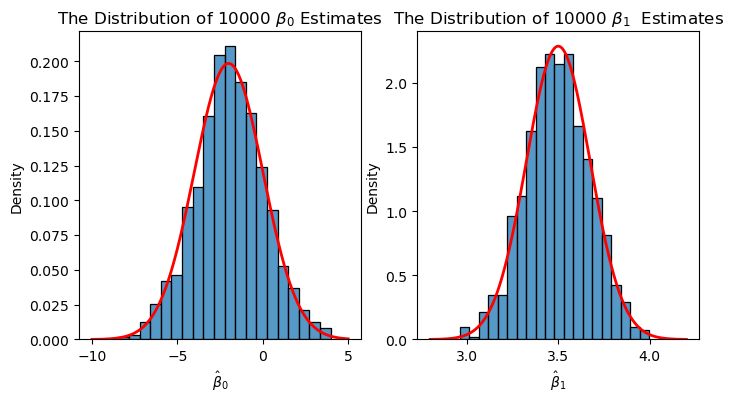

In [30]:
# divide plot area as 1-by-2 array
fig,axes=plt.subplots(1,2, figsize=(8,4))

# plot histograms of beta_0 estimates

sns.histplot(ax=axes[0],data=fit[:,0], bins=20, stat='density')

# add true distribution to plot
x = np.arange(-10, 5, 0.001)
axes[0].plot(x,norm.pdf(x, loc=-2, scale=np.sqrt(var_b0)),'r-', lw=2)
axes[0].set_xlabel(r'$ \hat{ \beta}_{0}$')
axes[0].set_title(r'The Distribution of 10000 $\beta_{0}$ Estimates')

# plot histograms of beta_hat_1 
sns.histplot(ax=axes[1],data=fit[:,1], bins=20, stat='density')

# add true distribution to plot
x = np.arange(2.8, 4.2, 0.001)
axes[1].plot(x,norm.pdf(x, loc=3.5, scale=np.sqrt(var_b1)),'r-', lw=2)
axes[1].set_xlabel(r'$ \hat{ \beta}_{1}$')
axes[1].set_title(r'The Distribution of 10000 $\beta_{1}$  Estimates');

## Simulation Study 2


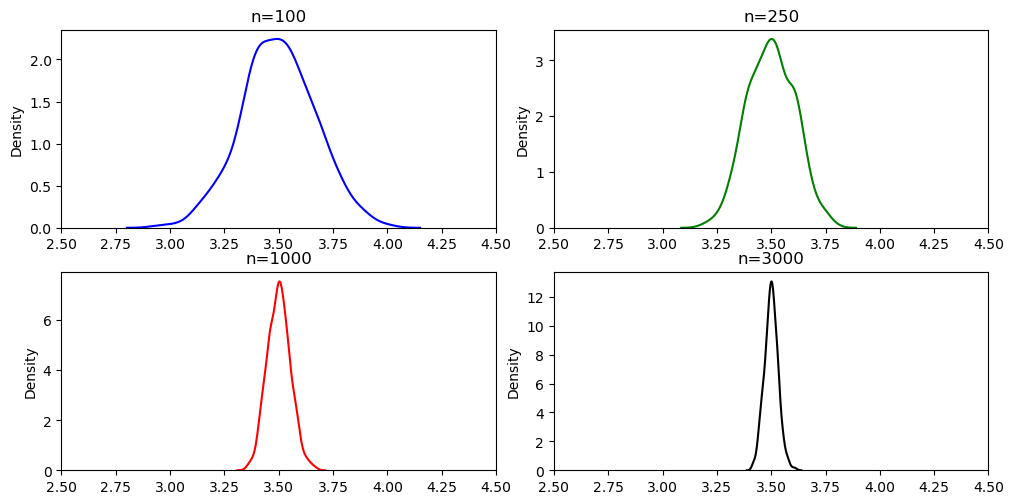

In [31]:
# set a seed to make the results reproducible
np.random.seed(2)

# set repetitions and the vector of sample sizes
reps=1000
n=[100,250,1000,3000]

# initialize the matrix of outcomes
fit = np.zeros((reps,2))

# divide the plot panel in a 2-by-2 array
fig,axes=plt.subplots(2,2, figsize=(10,5))
plt.tight_layout()

# loop sampling and plotting

# outer loop over n
colors=['b','g','r','k']
for j, ax in enumerate(axes.flat):
# inner loop: sampling and estimating of the coefficients
    for i in range(reps):
        sample = population.loc[np.random.choice(N, size=n[j]),]
        fit[i, ] = sm.OLS(sample['Y'] , sm.add_constant(sample['X'])).fit().params
    sns.kdeplot(ax=ax,data=fit[:,1], color=colors[j])
    ax.set_xlim(2.5,4.5)
    ax.set_title(f'n={n[j]}')          


## Simulation Study 3

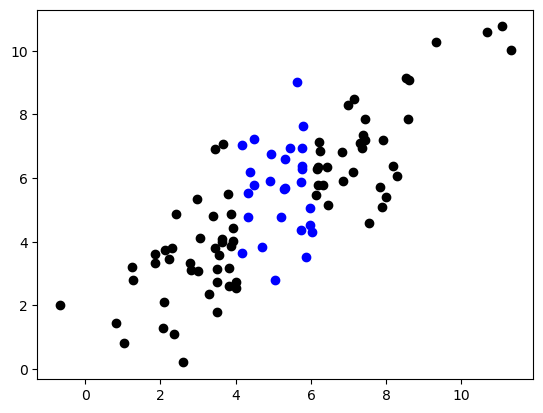

In [32]:
# set seed for reproducibility
np.random.seed(9)

# simulate bivarite normal data
bvndata = np.random.multivariate_normal(mean=[5, 5], cov=[[5, 4],[4, 5]], size=100)

# assign column names / convert to data.frame
bvndata = pd.DataFrame({'X':bvndata[:,0],'Y':bvndata[:,1]})

# subset the data
set1 = bvndata.query('abs(X.mean()-X)>1')
set2 = bvndata.query('abs(X.mean()-X)<=1')

# plot both data sets
plt.plot(set1['X'],set1['Y'], 'ko')
plt.plot(set2['X'],set2['Y'], 'bo');

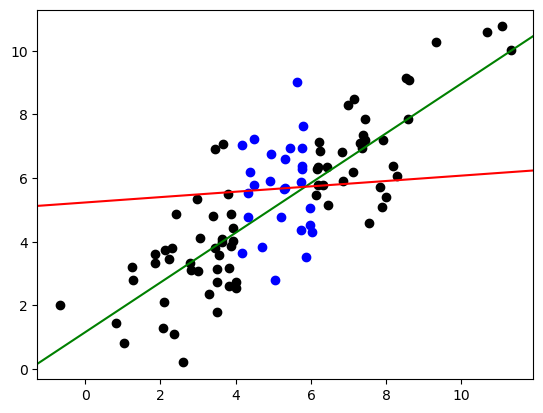

In [33]:
# estimate both regression lines
lm_set1=smf.ols('Y~X', data=set1).fit()
lm_set2=smf.ols('Y~X', data=set2).fit()

# plot observations
plt.plot(set1['X'],set1['Y'], 'ko')
plt.plot(set2['X'],set2['Y'], 'bo')

# add both lines to the plot
plt.axline((0,lm_set1.params[0]), slope=lm_set1.params[1], color='green')
plt.axline((0,lm_set2.params[0]), slope=lm_set2.params[1], color='red');

### Notes:
  - [Good discussion](https://stats.stackexchange.com/questions/243452/the-least-squares-assumptions) about the third assumption